Problem Statement :
Uncover the factors that lead to employee attrition.

Categorical Columns :

Education

1. Below College; 2. College; 3. Bachelor; 4. Master; 5. Doctor

EnvironmentSatisfaction

1. Low; 2. Medium; 3. High; 4. Very High

JobInvolvement

1. Low; 2. Medium; 3. High; 4. Very High

JobSatisfaction

1. Low; 2. Medium; 3. High; 4. Very High

PerformanceRating

1. Low; 2. Good; 3. Excellent; 4. Outstanding

RelationshipSatisfaction

1. Low; 2. Medium; 3. High; 4. Very High

WorkLifeBalance

1. Bad; 2. Good; 3. Better; 4. Best

Attrition
0. still employed; 1. Left the company;

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve,roc_auc_score,precision_recall_curve, auc, f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [210]:
df = pd.read_csv("/content/drive/MyDrive/task1/WA_Fn-UseC_-HR-Employee-Attrition (1).csv")

In [211]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [212]:

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [213]:
df.shape

(1470, 35)

In [214]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Text(0.5, 1.0, 'YearsWithCurrManager')

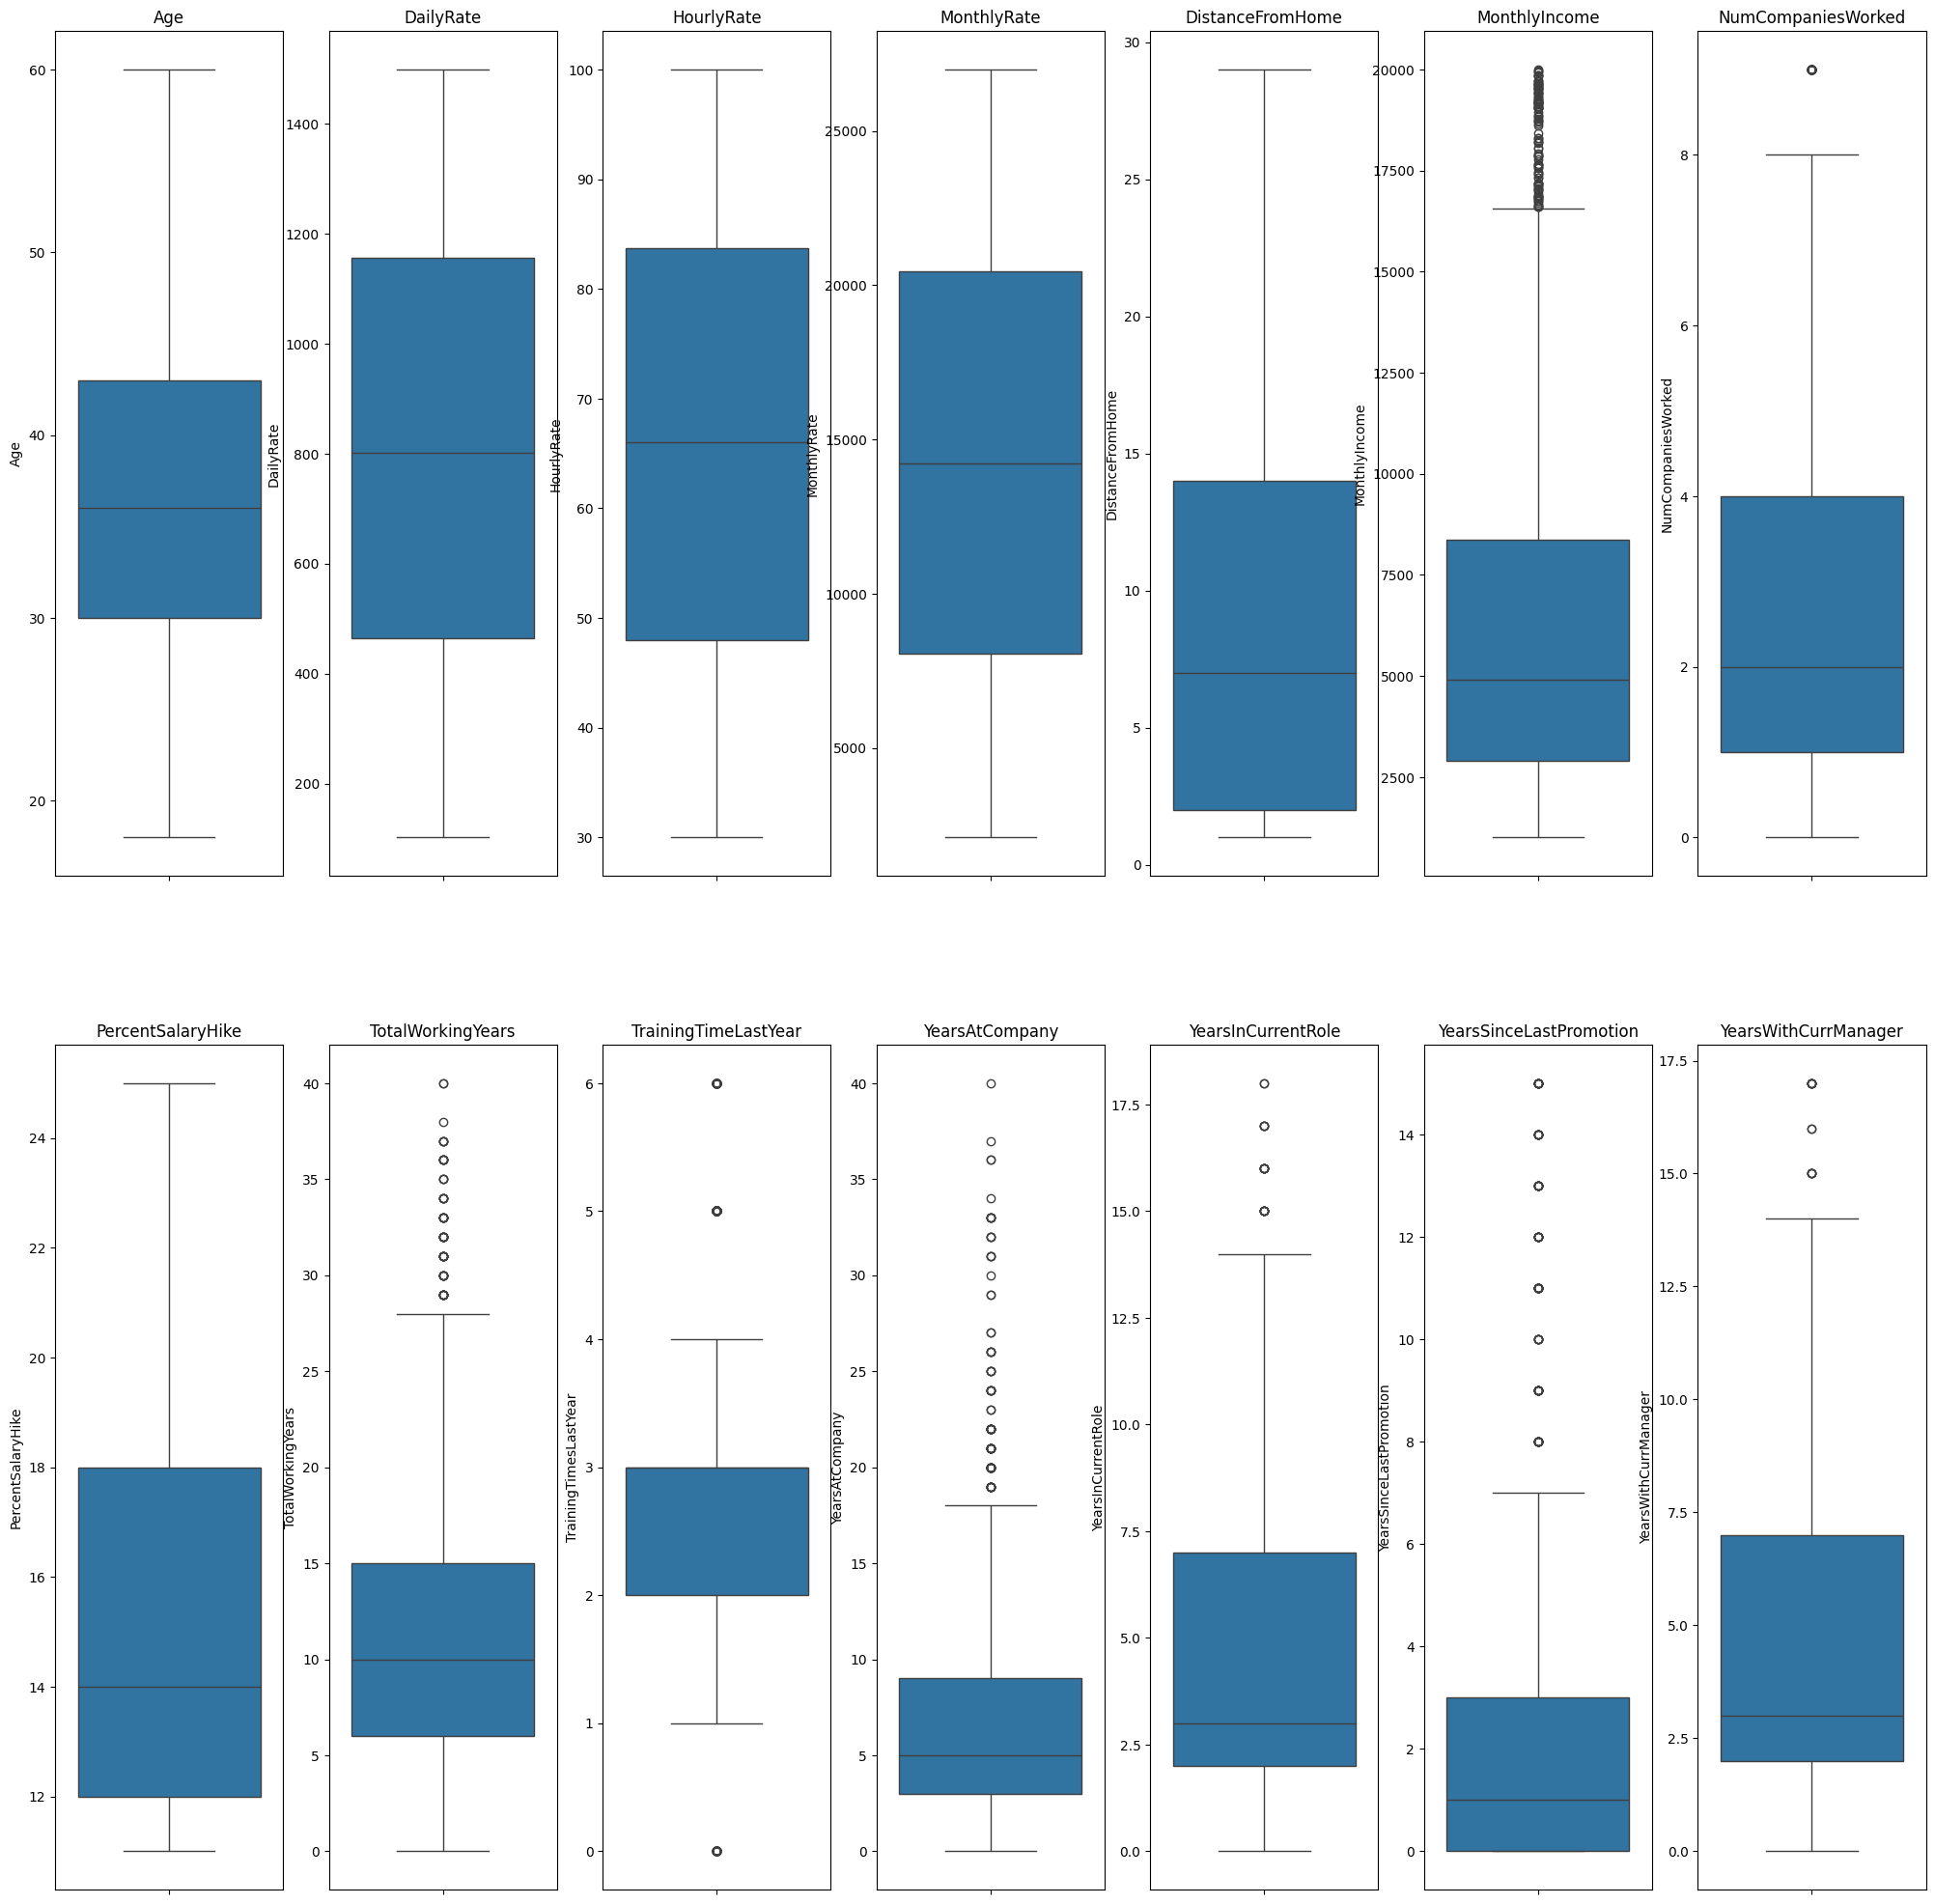

In [215]:
f,ax=plt.subplots (2,7,figsize=(25,25))
sns.boxplot(data=df['Age'],ax=ax[0][0]).set_title('Age')
sns.boxplot(data=df['DailyRate'],ax=ax[0][1]).set_title('DailyRate')
sns.boxplot(data=df['HourlyRate'],ax=ax[0][2]).set_title('HourlyRate')
sns.boxplot(data=df['MonthlyRate'],ax=ax[0][3]).set_title('MonthlyRate')
sns.boxplot(data=df['DistanceFromHome'],ax=ax[0][4]).set_title('DistanceFromHome')
sns.boxplot(data=df['MonthlyIncome'],ax=ax[0][5]).set_title('MonthlyIncome')
sns.boxplot(data=df['NumCompaniesWorked'],ax=ax[0][6]).set_title('NumCompaniesWorked')
sns.boxplot(data=df['PercentSalaryHike'],ax=ax[1][0]).set_title('PercentSalaryHike')
sns.boxplot(data=df['TotalWorkingYears'],ax=ax[1][1]).set_title('TotalWorkingYears')
sns.boxplot(data=df['TrainingTimesLastYear'],ax=ax[1][2]).set_title('TrainingTimeLastYear')
sns.boxplot(data=df['YearsAtCompany'],ax=ax[1][3]).set_title('YearsAtCompany')
sns.boxplot(data=df['YearsInCurrentRole'],ax=ax[1][4]).set_title('YearsInCurrentRole')
sns.boxplot(data=df['YearsSinceLastPromotion'],ax=ax[1][5]).set_title('YearsSinceLastPromotion')
sns.boxplot(data=df['YearsWithCurrManager'],ax=ax[1][6]).set_title('YearsWithCurrManager')

MonthlyIncome,TotalWorkingYears,YearsAtCompany have a large number of outliers

NumCompaniesWorked,TrainingTimeLastYear,YearsInCurrentRole,YearsWithCurrManager have moderate amount of outliers

Age,DailyRate,HourlyRate,MonthlyRate,DistanceFromHome do not have outliers

In [216]:
for column in df.columns:
  unique_count=df[column].nunique()
  if unique_count==1:
    print(f"column {column} has only one unique value")
  else:
    print(f"column {column} doesn't have only one unique value")


column Age doesn't have only one unique value
column Attrition doesn't have only one unique value
column BusinessTravel doesn't have only one unique value
column DailyRate doesn't have only one unique value
column Department doesn't have only one unique value
column DistanceFromHome doesn't have only one unique value
column Education doesn't have only one unique value
column EducationField doesn't have only one unique value
column EmployeeCount has only one unique value
column EmployeeNumber doesn't have only one unique value
column EnvironmentSatisfaction doesn't have only one unique value
column Gender doesn't have only one unique value
column HourlyRate doesn't have only one unique value
column JobInvolvement doesn't have only one unique value
column JobLevel doesn't have only one unique value
column JobRole doesn't have only one unique value
column JobSatisfaction doesn't have only one unique value
column MaritalStatus doesn't have only one unique value
column MonthlyIncome doesn't

dropping the EmployeeCount,EmployeeNumber,Over18,StandardHours because they all have the same value for all the employees

In [217]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


<ipython-input-218-56eb475bbbfa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

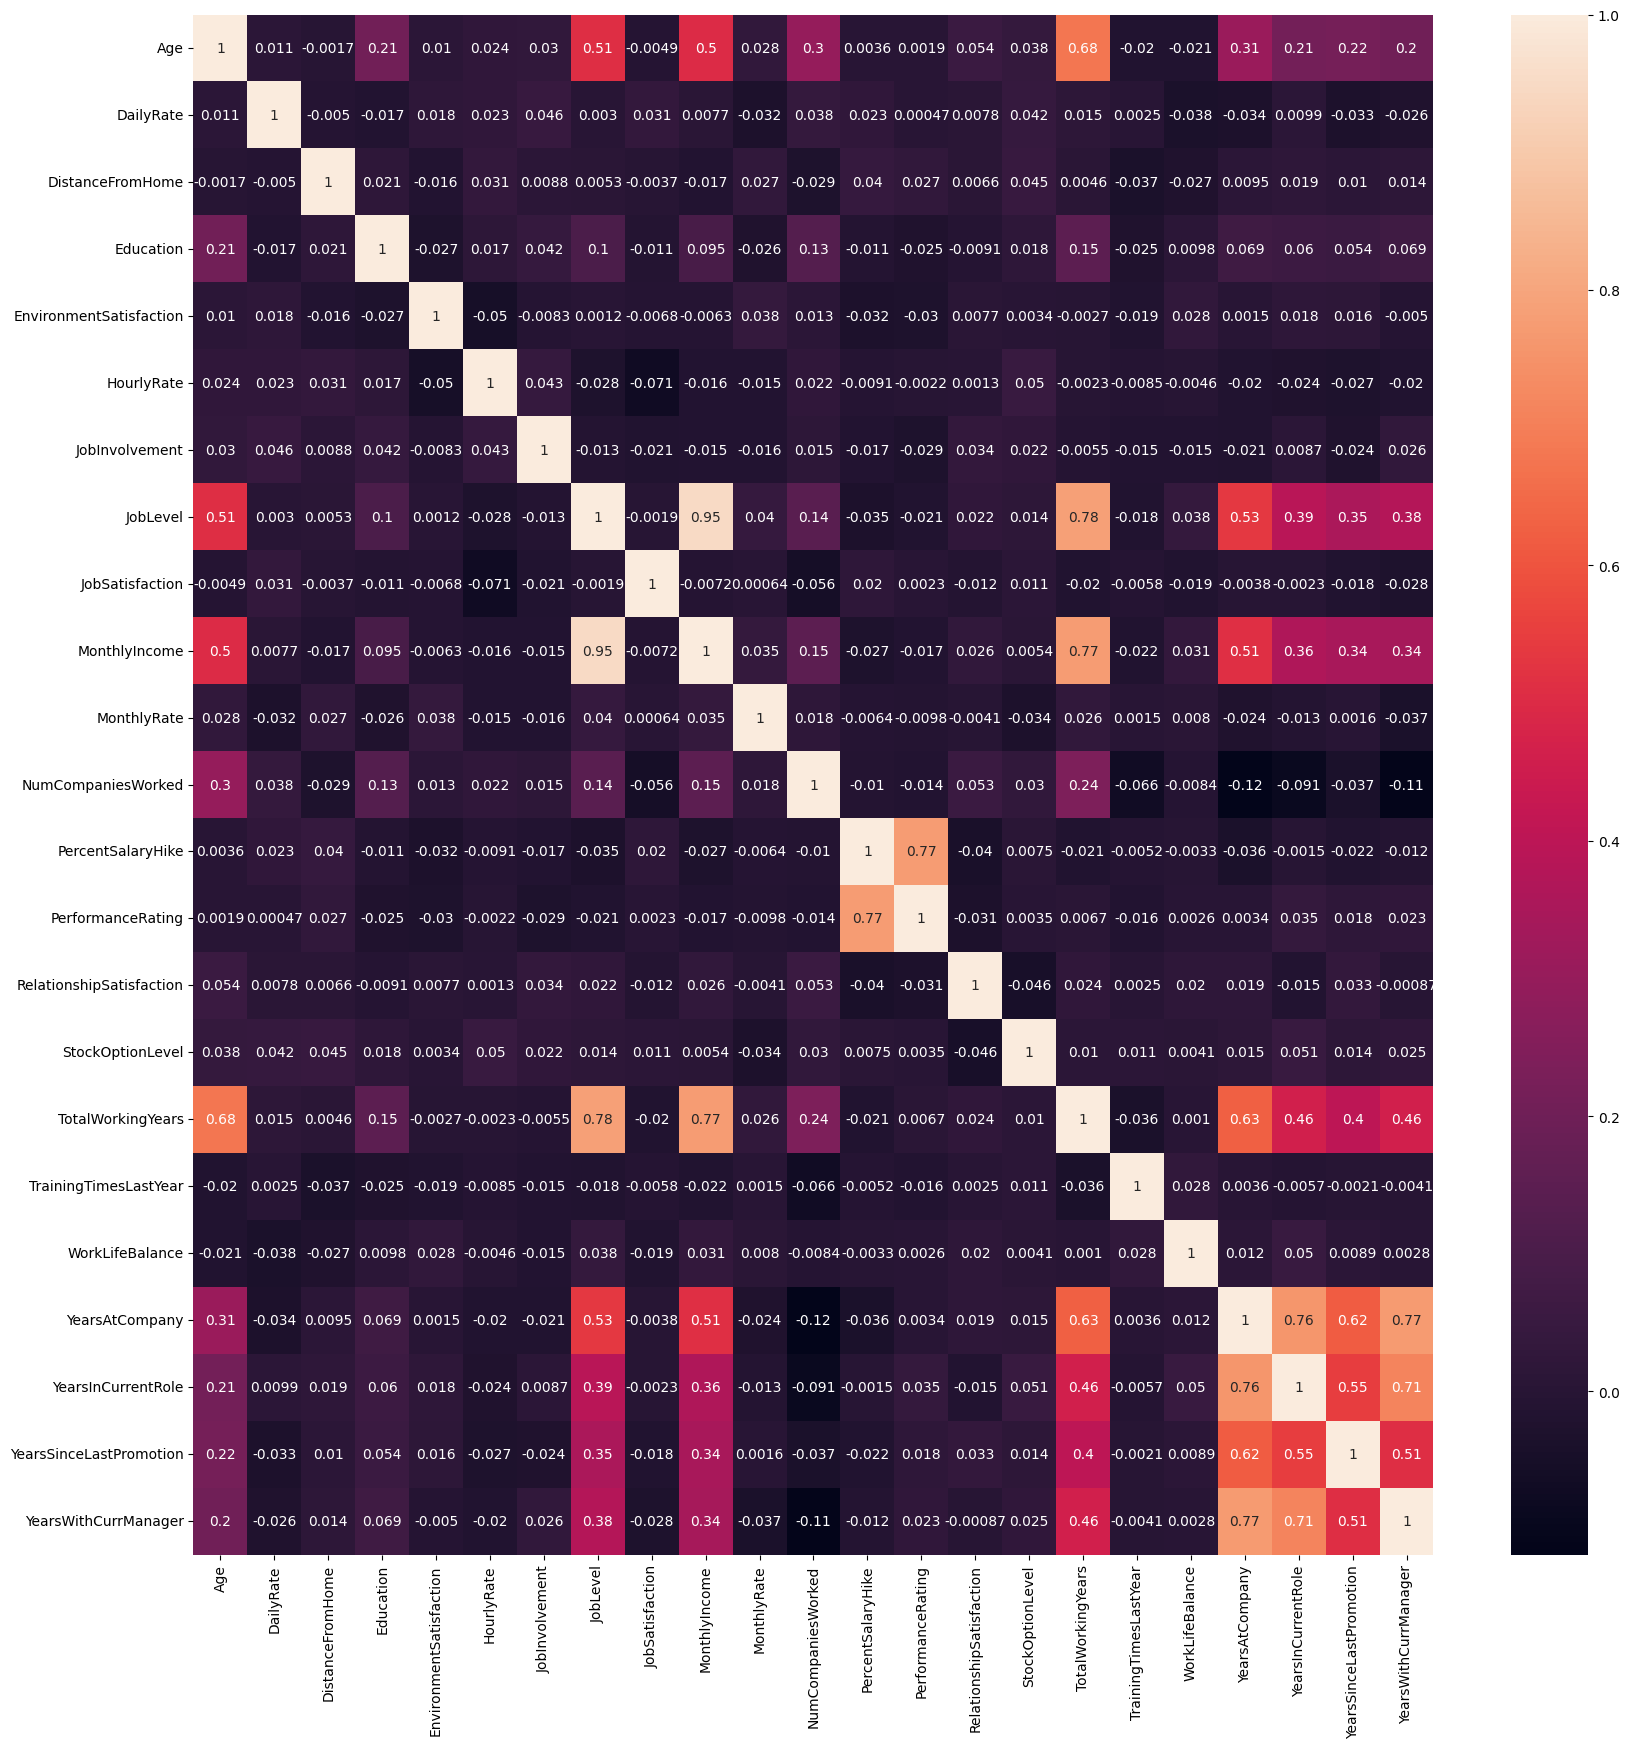

In [218]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot = True)

<Axes: ylabel='Attrition'>

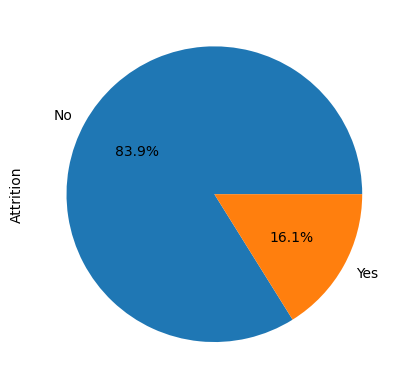

In [219]:
df['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<ipython-input-220-ae16b942ec89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Attrition']=='No']['Age'],hist=False,label='No')
<ipython-input-220-ae16b942ec89>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Attrition']=='Yes']['Age'],hist=False,color='r',lab

Text(0.5, 1.0, 'Age vs Attrition')

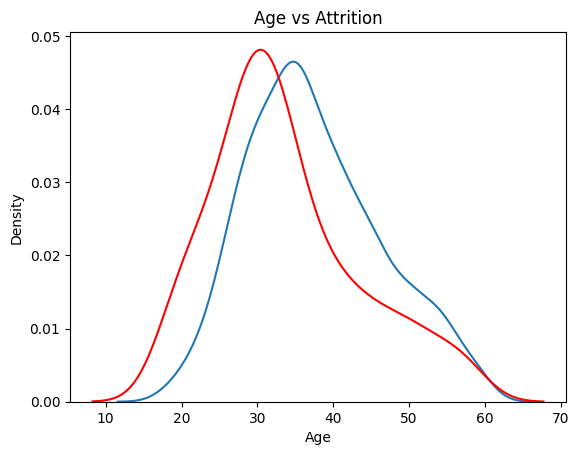

In [220]:
sns.distplot(df[df['Attrition']=='No']['Age'],hist=False,label='No')
sns.distplot(df[df['Attrition']=='Yes']['Age'],hist=False,color='r',label='Yes')
plt.title("Age vs Attrition")

Employees who leave the company tend to be younger, typically between the ages of 20 and 40, compared to those who stay.

<ipython-input-221-94dbc2e1dad5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Attrition']=='No']['PercentSalaryHike'],hist=False,label='No')
<ipython-input-221-94dbc2e1dad5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Attrition']=='Yes']['PercentSalaryHik

Text(0.5, 1.0, 'PercentSalaryHike vs Attrition')

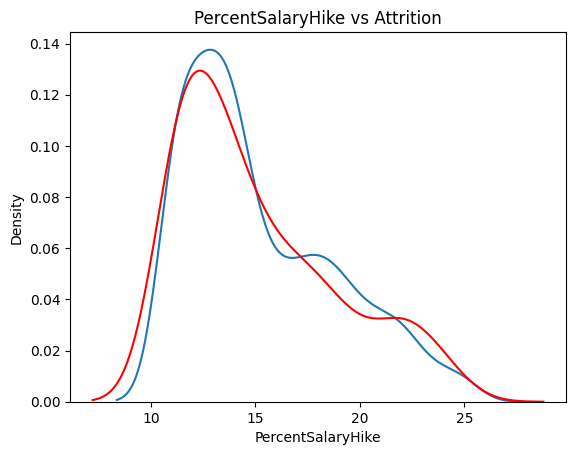

In [221]:
sns.distplot(df[df['Attrition']=='No']['PercentSalaryHike'],hist=False,label='No')
sns.distplot(df[df['Attrition']=='Yes']['PercentSalaryHike'],hist=False,color='r',label='Yes')
plt.title("PercentSalaryHike vs Attrition")

Salary increases don't seem to be a major reason why employees leave the company.







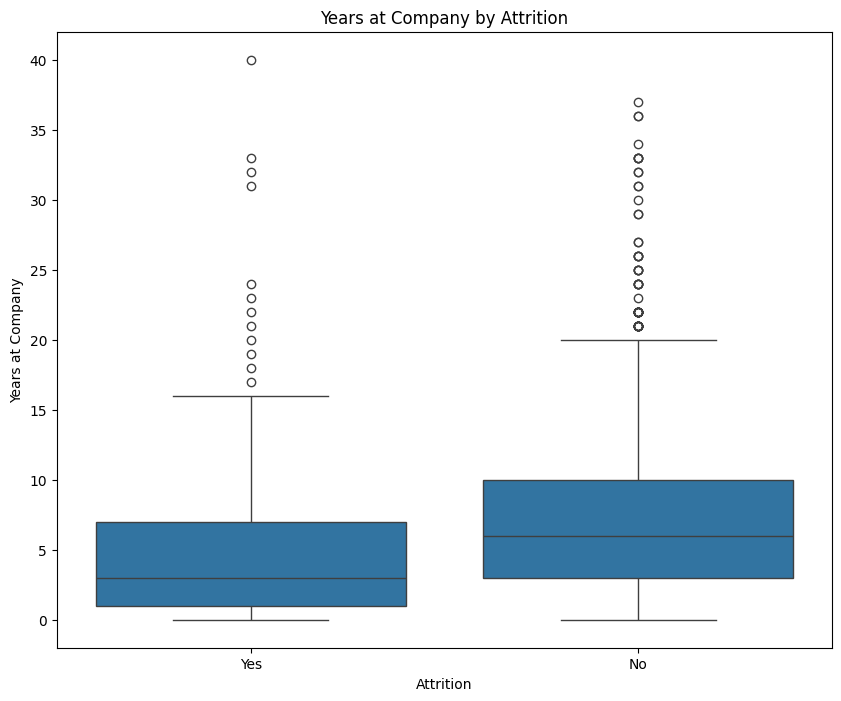

In [222]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Years at Company by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()

Most employees who leave the company have worked there for less than 3 years.

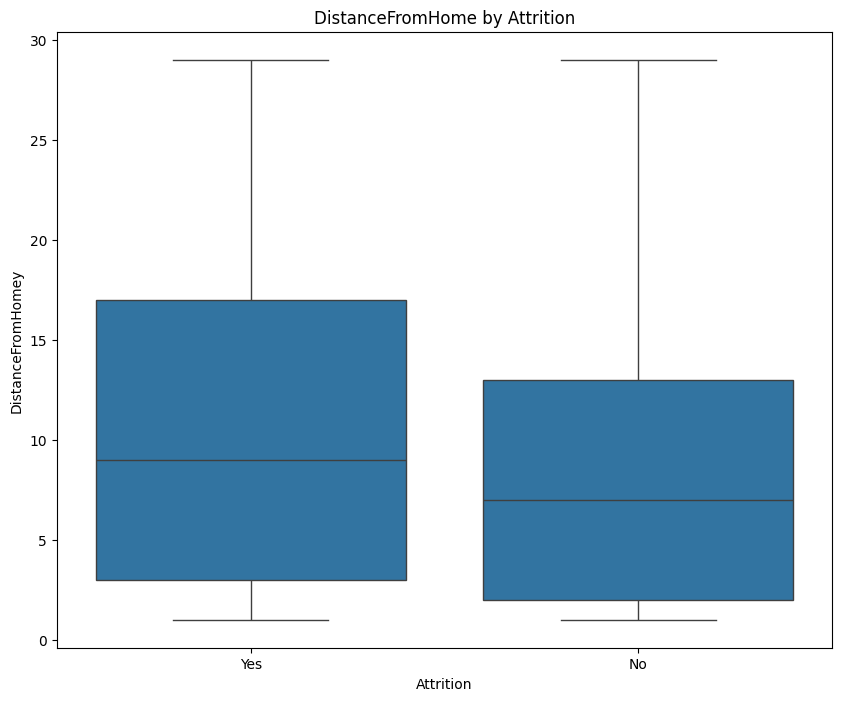

In [223]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('DistanceFromHome by Attrition')
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHomey')
plt.show()

How far an employee lives from work doesn't have much impact on whether they leave the company.

<Axes: xlabel='Gender'>

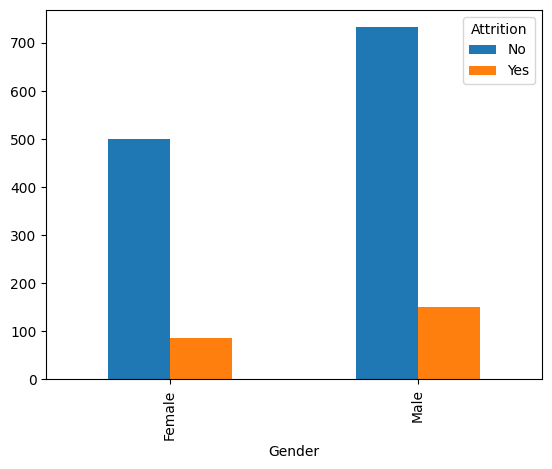

In [224]:
ct = pd.crosstab(df['Gender'], df['Attrition'])
ct.plot(kind = 'bar')

Overall, it doesn't appear that attrition is influenced by gender.

In [225]:
a = pd.crosstab(df['BusinessTravel'], df['Attrition'])
a['per'] = a['Yes']/(a['Yes']+a['No'])
a

Attrition,No,Yes,per
BusinessTravel,,,
Non-Travel,138,12,0.080000
Travel_Frequently,208,69,0.249097
Travel_Rarely,887,156,0.149569


Among all employees, those who travel frequently have the highest attrition rate

In [226]:
a = pd.crosstab(df['Department'], df['Attrition'])
a['total'] = a['No']+a['Yes']
a['per'] = a['Yes']/(a['Yes']+a['No'])
a

Attrition,No,Yes,total,per
Department,,,,
Human Resources,51,12,63,0.190476
Research & Development,828,133,961,0.138398
Sales,354,92,446,0.206278


The company hires the most people in the R&D department, and the attrition rate in this department is lower than in the other two departments

<Axes: ylabel='Education'>

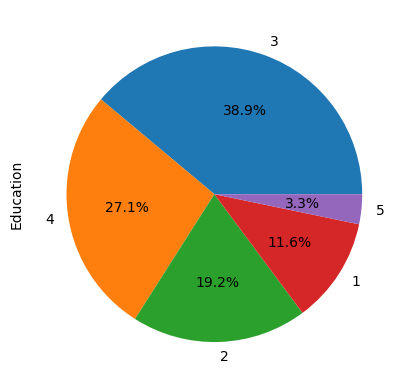

In [227]:
df.Education.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

<Axes: xlabel='Education'>

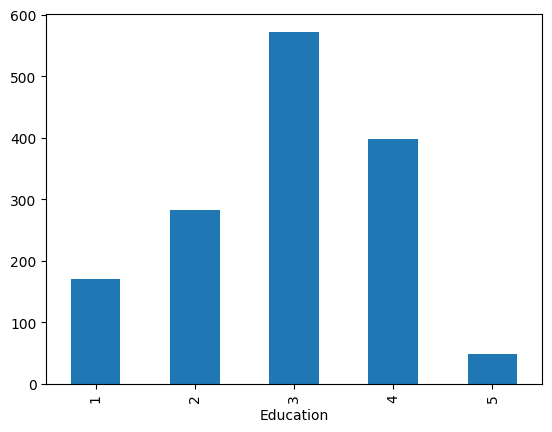

In [228]:
df.groupby(['Education'])['Attrition'].count().plot(kind = 'bar')

Employees with a Bachelor's degree have the highest attrition rate, and those with a Master's degree have the next highest rate.

<Axes: xlabel='MaritalStatus'>

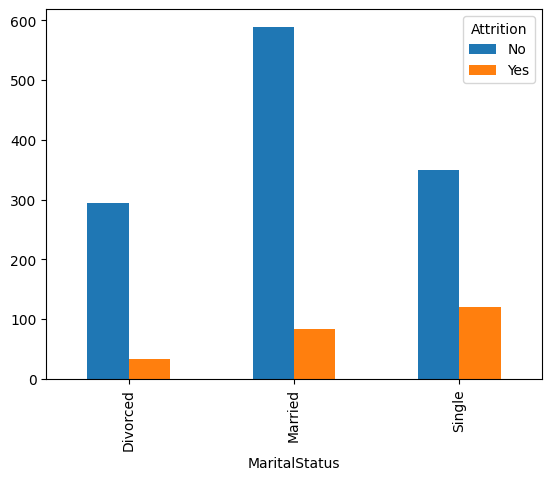

In [229]:
pd.crosstab( df.MaritalStatus, df.Attrition).plot(kind = 'bar')

Most of the time, employees leave the organization before getting married at least once.

<Axes: ylabel='JobRole'>

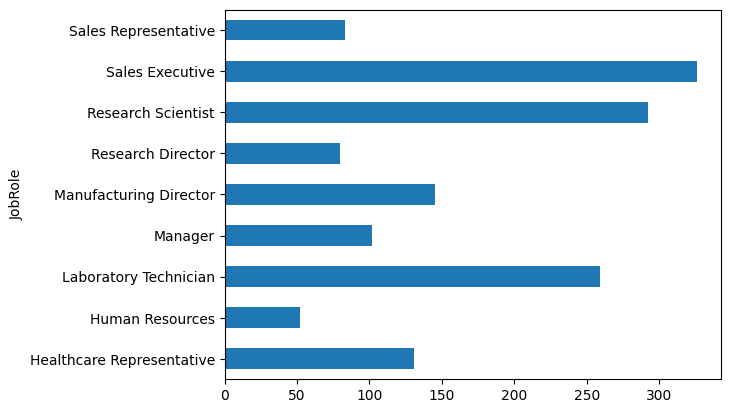

In [230]:
df.groupby(['JobRole'])['Attrition'].count().plot(kind = 'barh')

Sales executives leave the company the most, followed by research scientists and laboratory technicians.

<ipython-input-231-f5325c1201cc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Attrition']).mean()['MonthlyIncome'].plot(kind = 'bar')


Text(0, 0.5, 'Average Monthly Income')

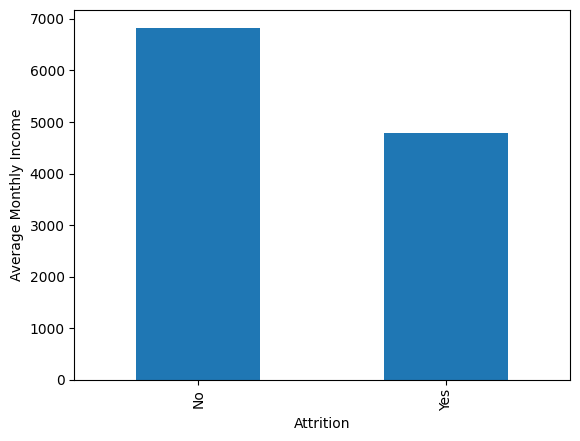

In [231]:
df.groupby(['Attrition']).mean()['MonthlyIncome'].plot(kind = 'bar')
plt.ylabel('Average Monthly Income')

On average, employees who leave the company have lower monthly income than those who stay.

In [232]:
a = pd.crosstab( df.EnvironmentSatisfaction, df.Attrition)
a

Attrition,No,Yes
EnvironmentSatisfaction,,
1,212,72
2,244,43
3,391,62
4,386,60


Text(0.5, 0, 'Environment_Satisfaction')

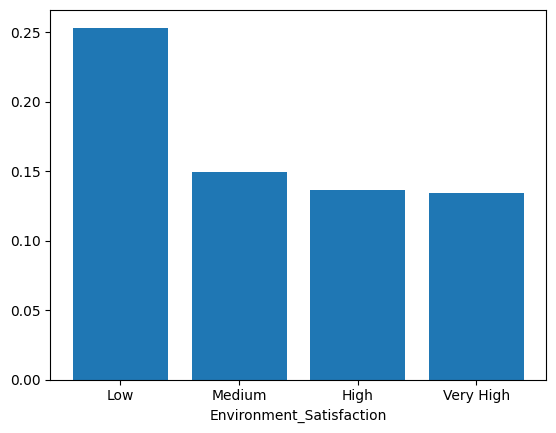

In [233]:
a['Rate'] = a["Yes"]/(a["Yes"]+a["No"])
plt.bar(a.index,a.Rate)
plt.xticks(a.index,['Low','Medium','High','Very High'])
plt.xlabel('Environment_Satisfaction')

Attrition,No,Yes
StockOptionLevel,,
0,477,154
1,540,56
2,146,12
3,70,15


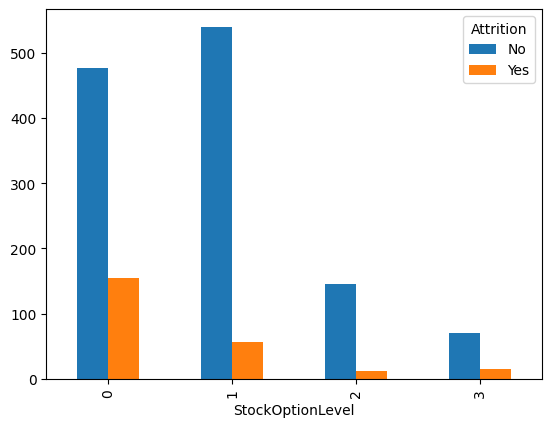

In [234]:
b = pd.crosstab(df.StockOptionLevel, df.Attrition)
b.plot(kind = 'bar')
b

Text(0.5, 0, 'Stock Option ')

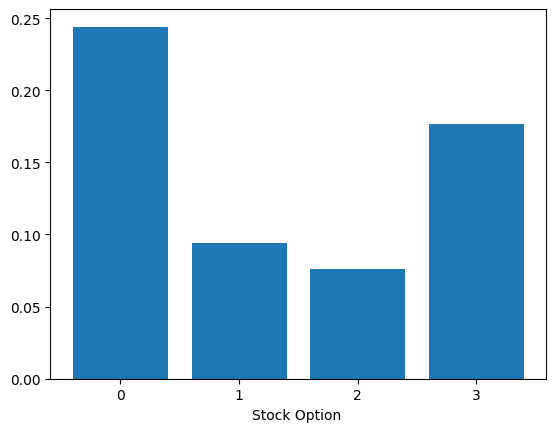

In [235]:
b['Rate'] = b["Yes"]/(b["No"]+b["Yes"])
plt.bar(b.index,b.Rate)
plt.xticks(b.index,['0','1','2','3'])
plt.xlabel('Stock Option ')

On average, most employees who don't have stock options leave the organization.

**Model Building :**

Applying Label Encoding

In [236]:
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['OverTime']=le.fit_transform(df['OverTime'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


**Defining the target variable**

In [237]:
X=df.drop(['Attrition'],axis=1)
y=df['Attrition']

**Applying Train Test split on the dataset**

In [238]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)


**Now lets apply different models and look at their accuracy scores**

**Decision Tree Modeling**

In [239]:
clf=DecisionTreeClassifier()

**Searching for best parameters**

In [240]:
tree_params={'criterion':['gini','entropy'],
             'splitter':['best','random'],
             'max_depth':[3,4,5,6],
             'max_features':['auto','log2'],
             'random_state':[5]}
grid=GridSearchCV(clf,tree_params,cv=10)


In [241]:
best_parameters_search=grid.fit(x_train,y_train)
best_parameters_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'random_state': 5,
 'splitter': 'random'}

In [242]:
a=grid.fit(x_train,y_train)
y_pred=a.predict(x_test)
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       365
           1       0.55      0.14      0.23        76

    accuracy                           0.83       441
   macro avg       0.70      0.56      0.57       441
weighted avg       0.79      0.83      0.79       441



**logistic regression model**

In [243]:
lg=LogisticRegression().fit(x_train,y_train)
predection=lg.predict(x_test)
print(classification_report(y_test,predection))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       365
           1       0.50      0.01      0.03        76

    accuracy                           0.83       441
   macro avg       0.66      0.51      0.47       441
weighted avg       0.77      0.83      0.75       441



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**as i didn't remove the outliers we can see that the logisic regression is not good as it is sensitive to the outliers**

**SMOTE Technique**

since there is imbalance in the target variable we are using SMOTE over-sampling techique

In [244]:
smo=SMOTE()
x_resampled,y_resampled=smo.fit_resample(X,y)

In [245]:
print(len(x_resampled))
print(len(y_resampled))

2466
2466


In [246]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=5)

In [247]:
a=grid.fit(x_train,y_train)
y_pred_dt=a.predict(x_test)
print(classification_report(y_test,y_pred_dt))

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

              precision    recall  f1-score   support

           0       0.72      0.79      0.76       359
           1       0.79      0.71      0.75       381

    accuracy                           0.75       740
   macro avg       0.75      0.75      0.75       740
weighted avg       0.76      0.75      0.75       740



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


**Random Forest Modeling**

In [248]:
rf=RandomForestClassifier()
a_rf=rf.fit(x_train,y_train)
y_pred_rf=a_rf.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       359
           1       0.93      0.84      0.88       381

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740



**Ranking the features in descending order**

In [249]:
fe=rf.feature_importances_
fe=pd.Series(fe,index=X.columns)
fe.sort_values(ascending=False)

StockOptionLevel            0.081583
MonthlyIncome               0.066843
JobInvolvement              0.062359
JobSatisfaction             0.057031
JobLevel                    0.044952
TotalWorkingYears           0.042633
DailyRate                   0.041906
MonthlyRate                 0.041554
RelationshipSatisfaction    0.040711
DistanceFromHome            0.039324
EnvironmentSatisfaction     0.038817
YearsAtCompany              0.038125
HourlyRate                  0.037608
Age                         0.036609
YearsWithCurrManager        0.035525
WorkLifeBalance             0.034660
YearsInCurrentRole          0.032658
Education                   0.025083
TrainingTimesLastYear       0.024207
EducationField              0.023903
BusinessTravel              0.023430
PercentSalaryHike           0.022477
NumCompaniesWorked          0.021741
JobRole                     0.020510
YearsSinceLastPromotion     0.020496
MaritalStatus               0.013844
OverTime                    0.011127
G

**lets balance the data again in a different way**

In [250]:
majority_class=df[df['Attrition']==0]
minority_class=df[df['Attrition']==1]
print(len(majority_class))
print(len(minority_class))

1233
237


In [251]:
minority_class_upsampled=resample(minority_class,replace=True,n_samples=1233,random_state=1)


In [252]:
data_balanced=pd.concat([majority_class,minority_class_upsampled])
data_balanced['Attrition'].value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

In [253]:
X=data_balanced.drop(['Attrition'],axis=1)
y=data_balanced['Attrition']

In [254]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state = 1)

In [255]:
rf.fit(x_train1,y_train1)
y_pred1 = rf.predict(x_test1)
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       355
           1       0.96      0.99      0.97       385

    accuracy                           0.97       740
   macro avg       0.97      0.97      0.97       740
weighted avg       0.97      0.97      0.97       740



<Axes: >

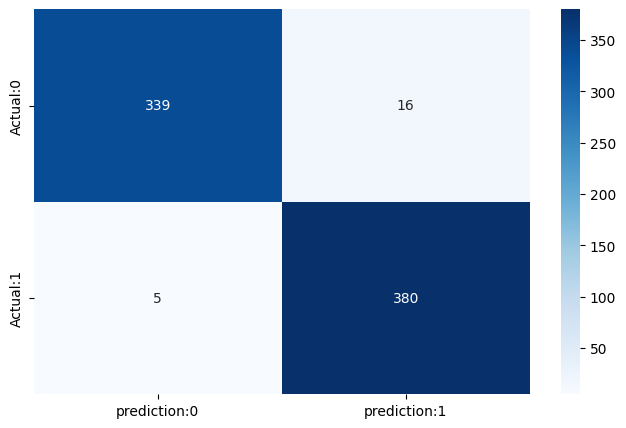

In [256]:
cm=confusion_matrix(y_test1,y_pred1)
conf_matrix=pd.DataFrame(data=cm,columns=['prediction:0','prediction:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=plt.cm.Blues)


<ipython-input-257-def82e1c6f7c>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')


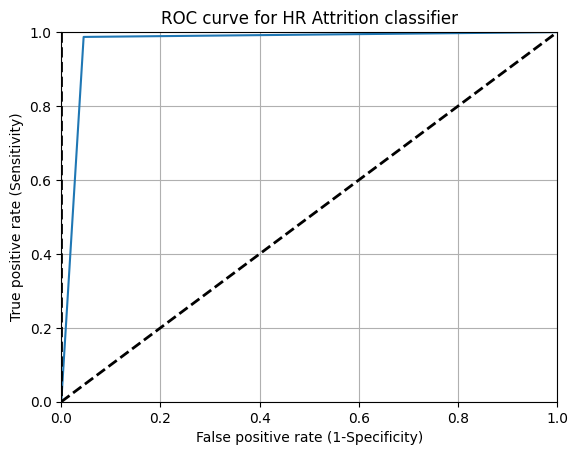

In [257]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.title('ROC curve for HR Attrition classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [258]:
score = roc_auc_score(y_test1,y_pred1)
print('Model Accuracy Score: ', score)

Model Accuracy Score:  0.9709712822388877


In [259]:
results_df = pd.DataFrame({
    'EmployeeID': x_test1.index,
    'Predicted Attrition': y_pred1,
    'Actual Attrition': y_test1
})
print(results_df)

      EmployeeID  Predicted Attrition  Actual Attrition
569          569                    0                 0
1369        1369                    1                 1
331          331                    0                 0
521          521                    0                 0
130          130                    0                 0
...          ...                  ...               ...
1353        1353                    1                 1
51            51                    1                 1
422          422                    1                 1
1410        1410                    0                 0
1281        1281                    1                 1

[740 rows x 3 columns]
